# <center> <font color='blue'> PROJETO: Prevendo o Nível de Satisfação dos Clientes do Santander

![title](imagens/projeto.png)

<justify> Neste projeto iremos utilizar dados dos clientes do santander para avaliar o nível de satisfação dos mesmos, tais informações serão de grande utilizade para avaliação de campanhas capazes de aumentar o nível de satisfação de clientes insatisfeitos e manter a alta satisfação dos demais. O principal desafio a nossa frente é apresentar um modelo com acurácia superior a 70% para identificar clientes insatisfeitos.

## <center> <font color='blue'> FERRAMENTAS  

In [1]:
#Importando as bibliotecas a serem utilizadas

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
#Carregando os dados

#iremos carregar os dados em um df para realizar análise exploratória
df = pd.read_csv("datasets/train.csv")

## <center> <font color='blue'> ANÁLISE EXPLORATÓRIA DOS DADOS

In [3]:
#O dataset é constituido por 371 variáveis preditoras e 76020 observações

df.shape

(76020, 371)

In [4]:
#Cinco primeiras observações

df.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


<justify>O dataset apresenta um elevado número de variváveis (370), o que pode ser levemente problemático...

In [5]:
#A variável ID presente no dataset não apresenta nenhuma informação relevante para a análise de satsfação, dito isto 
#iremos excluir
df = df.iloc[:,1:]
df.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


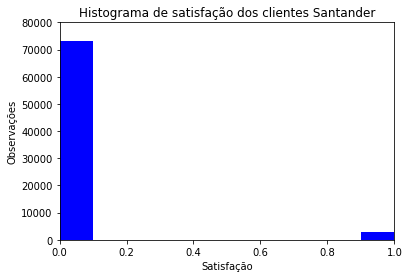

In [6]:
#Através do histograma da variável alvo podemos perceber que nossos dados são extremamente desbalanceados, devido a isso 
#teremos de utilizar técnicas como SMOTE ou atribuir pesos as classes a serem preditos

plt.hist(df["TARGET"], facecolor='b', alpha=1)

plt.xlabel('Satisfação')
plt.ylabel('Observações')
plt.title('Histograma de satisfação dos clientes Santander')
plt.xlim(0, 1)
plt.ylim(0, 80000)
plt.grid(False)
plt.show()

## <center> <font color='blue'> TRABALHANDO A QUESTÃO DA DIMENSIONALIDADE

In [7]:
X_treino = df.iloc[:,0:271]
y_treino = df.iloc[:,271]

In [8]:
pca_all = PCA(n_components=None)

In [9]:
pca_treino_all = pca_all.fit_transform(X_treino)
exp_var_pca = pca_all.explained_variance_ratio_

In [10]:
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

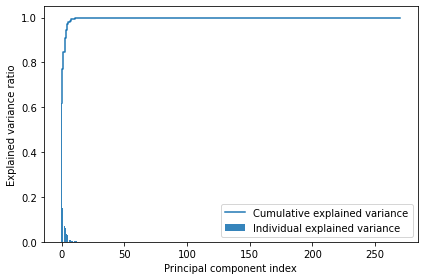

In [11]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.9, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

No grafico acima podemos observar que maior parte da variância é explicada por um pequeno número de variáveis (~100 já é explicado por um numéro de variáveis igual a 50!), o que torna desnecessário utilizar todas as variáveis.


In [12]:
#Iremos utilizar um número de variáveis que explique 95% da variância de nosso dataset

pca_95 = PCA(n_components=0.95)
pca_treino_95 = pca_95.fit_transform(X_treino)
exp_var_pca_95 = pca_95.explained_variance_ratio_
cum_sum_eigenvalues_95 = np.cumsum(exp_var_pca_95)

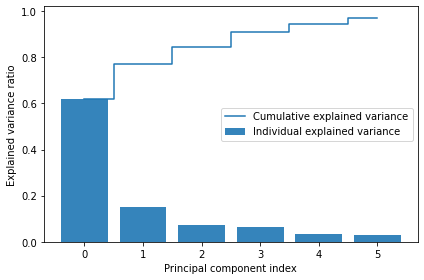

In [13]:
plt.bar(range(0,len(exp_var_pca_95)), exp_var_pca_95, alpha=0.9, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues_95)), cum_sum_eigenvalues_95, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

Como demonstrado no gráfico acima, uma redução de dimensionalidade de 270 para 6 nos permite explicar 95% da variância do dataset. Tais medidas nos ajuda a poupar poder computacional e gerar modelos mais "enxutos". 